In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
from os import system

system("pip install graphviz")


0

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data= pd.read_csv("../input/bank00/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:

data.loc[data['age']<=20, 'age']=0
data.loc[(data['age']<=40)&(data['age']>20), 'age']=1
data.loc[(data['age']<=60)&(data['age']>40), 'age']=2
data.loc[(data['age']<=80)&(data['age']>60), 'age']=3
data.loc[data['age']>80, 'age']=4

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data['y_map']= data['y'].factorize()[0]
data['loan_map']= data['loan'].factorize()[0]
data['housing_map']= data['housing'].factorize()[0]
data['default_map']= data['default'].factorize()[0]

data.head()

In [ ]:
data['job'] = data['job'].replace(['management', 'admin.'], 'white-collar')
data['job'] = data['job'].replace(['services','housemaid'], 'pink-collar')
data['job'] = data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
data.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

data_2= data[['balance','duration']]
data_2 = StandardScaler().fit_transform(data_2)
data_2 = pd.DataFrame(data_2, columns= ['balance','duration'])

data_2.head()

In [ ]:
data['balance']=data_2['balance']
data['duration']=data_2['duration']
data.head()

In [ ]:
data_cl=data[['age','job','marital','education','default_map','balance','housing_map','loan_map','y_map']]
data_co= data[['duration','month','campaign','previous','poutcome','y_map']]

In [ ]:
# Convert categorical variables to dummies
data_with_dummies = pd.get_dummies(data=data_cl, columns = ['job', 'marital', 'education'], \
                                   prefix = ['job', 'marital', 'education'])

data_co_dummies= pd.get_dummies(data=data_co, columns=['month','poutcome'])

data_with_dummies.head()


In [ ]:
g = sns.FacetGrid(data, col='y')
g.map(plt.hist, 'balance', bins=20)

In [ ]:
corr = data_with_dummies.corr()
corr


In [ ]:

data_final= data_with_dummies.drop('y_map',axis=1)

data_final.head()

In [ ]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [ ]:
# Extract the deposte_cat column (the dependent variable)
corr_y = pd.DataFrame(corr['y_map'].drop('y_map'))
corr_y.sort_values(by = 'y_map', ascending = False)

# build a data model

In [ ]:
# Train-Test split: 20% test data
data_drop = data_with_dummies.drop('y_map', 1)
label = data_with_dummies.y_map
data_train, data_test, label_train, label_test = train_test_split(data_drop, label, test_size = 0.2, random_state = 50)

In [ ]:
data_train.head()


In [ ]:
features = data_drop.columns.tolist()

features

In [ ]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt2, out_file="tree.dot", class_names = None, 
                           feature_names= features, impurity=True, filled=True)

In [ ]:
print('===============max depth = 3 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = 24
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(data_with_dummies):
        f_train = data_with_dummies.loc[train_fold] # Extract train data with cv indices
        f_valid = data_with_dummies.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['y_map'], axis=1), 
                               y = f_train["y_map"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['y_map'], axis=1), 
                                y = f_valid["y_map"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold: ", fold_accuracy)
    print("Average accuracy: ", avg, "\n")

In [ ]:
# DecicionTreeClassifier 생성
dt_clf = tree.DecisionTreeClassifier(max_depth=2 ,random_state=156)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

In [ ]:
feature_name= ['age','job','marital','education','default','balance','housing','loan']

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = None, 
                           feature_names= feature_name, impurity=True, filled=True)

In [ ]:
print('===============max depth = 3 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Feature importance 시각화

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt2.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(features, dt2.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt2.feature_importances_, y=features)

# PCA

In [ ]:
 from sklearn.decomposition import PCA

pca = PCA(n_components=3) #PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(data_with_dummies)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2','pc 3'])

principalDf

In [ ]:
data_with_dummies.loc[:, features].values.var()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2],c=data_with_dummies['y_map'])
plt.show()

In [ ]:
plt.scatter(principalDf['pc 1'],principalDf['pc 2'],principalDf['pc 3'],c=data_with_dummies['y_map'])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #PCA 객체 생성 (주성분 갯수 2개 생성)
PC = pca.fit_transform(data_co_dummies)
principalDf = pd.DataFrame(data = PC, columns = ['pc 1', 'pc 2'])

principalDf

In [ ]:
plt.scatter(principalDf['pc 1'],principalDf['pc 2'],c=data_co_dummies['y_map'])

# ML

In [ ]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

In [ ]:
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
#metrics_cols = []
log = pd.DataFrame(columns=log_cols)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
data_X=data_final
data_y=data_with_dummies['y_map']
rs.get_n_splits(data_X ,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]

        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
        log = log.append(log_entry)
        #metric = metric.append(metric_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

# Xgboost

# Catboost

In [7]:
from catboost import CatBoostClassifier

In [17]:
label= data['y']
data_final= data.drop('y',axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(data_final, label, test_size=0.25, random_state=1)

In [8]:
cat_features = [1,2,3,4,6,7,8,9,10,12,13,14,15]

In [ ]:
data.head()

In [ ]:
from catboost import Pool

train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )

In [ ]:
params2 = {
    'loss_function': 'Logloss',
    'eval_metric': 'F1', 
    'custom_metric': ['F1', 'Precision', 'Recall'],
    'random_seed': 42,
    'verbose': 200,
    'cat_features': cat_features,
}
cbc_1=CatBoostClassifier(**params2)
cbc_1.fit(X_train, y_train, eval_set=(X_valid, y_valid),
         use_best_model= True,
         plot= True)

In [ ]:
cbc_1.get_best_score()

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_features,
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 1
         }
cbc_2 = CatBoostClassifier(**params)
cbc_2.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True,
          plot=True
         );

In [ ]:
cbc_2.get_best_score()

In [24]:
feature_importance_df=cbc_2.get_feature_importance(prettified=True)
feature_importance_df

,Feature Id,Importances
0,duration,40.333044
1,month,12.245583
2,contact,11.760564
3,poutcome,9.583127
4,day,6.256309
5,housing,4.432450
6,age,2.770243
7,pdays,2.635621
8,campaign,2.448416
9,marital,2.286453


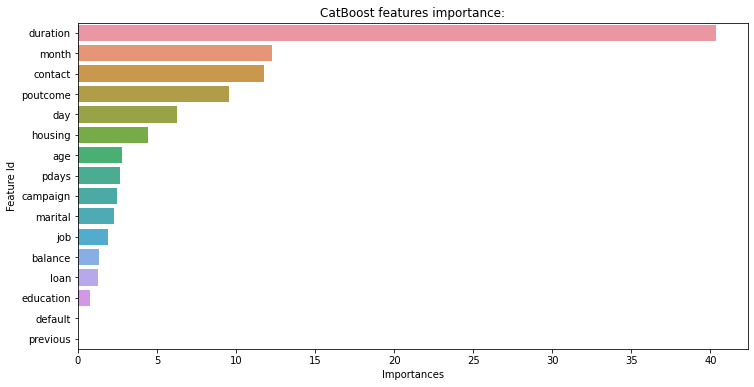

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost features importance:');

In [ ]:
from catboost.utils import get_roc_curve

catboost_pool = Pool(X_train, y_train,cat_features=cat_features)
(fpr, tpr, thresholds) = get_roc_curve(cbc_2, catboost_pool,plot=True)
print(fpr)
print(tpr)
print(thresholds)

In [ ]:
import shap
explainer = shap.TreeExplainer(cbc_2) # insert your model
shap_values = explainer.shap_values(train_data) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
data_client= data[['age','job','marital','education','default','balance','housing','loan','y']]

In [ ]:
label= data_client['y']
data_final= data_client.drop('y',axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(data_final, label, test_size=0.25, random_state=1)

In [ ]:
cat_features = [0,1,2,3,4,6,7]

In [ ]:
from catboost import Pool

train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )

In [ ]:
params2 = {
    'loss_function': 'Logloss',
    'eval_metric': 'F1', 
    'custom_metric': ['F1', 'Precision', 'Recall'],
    'random_seed': 42,
    'verbose': 200,
    'cat_features': cat_features,
}
cbc_1=CatBoostClassifier(**params2)
cbc_1.fit(X_train, y_train, eval_set=(X_valid, y_valid),
         use_best_model= True,
         plot= True)

In [ ]:
cbc_1.get_best_score()

In [ ]:
from catboost.utils import get_roc_curve

catboost_pool = Pool(X_train, y_train,cat_features=cat_features)
(fpr, tpr, thresholds) = get_roc_curve(cbc_1, catboost_pool,plot=True)
print(fpr)
print(tpr)
print(thresholds)

# resampling

In [12]:
from imblearn.over_sampling import RandomOverSampler

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [18]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [19]:
params2 = {
    'loss_function': 'Logloss',
    'eval_metric': 'F1', 
    'custom_metric': ['F1', 'Precision', 'Recall'],
    'random_seed': 42,
    'verbose': 200,
    'cat_features': cat_features,
}
cbc_1=CatBoostClassifier(**params2)
cbc_1.fit(X_resampled, y_resampled, eval_set=(X_valid, y_valid),
         use_best_model= True,
         plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.087064
0:	learn: 0.8335593	test: 0.4702093	best: 0.4702093 (0)	total: 164ms	remaining: 2m 44s
200:	learn: 0.9361583	test: 0.4952864	best: 0.5765397 (36)	total: 15.3s	remaining: 1m
400:	learn: 0.9466786	test: 0.4614777	best: 0.5765397 (36)	total: 30.7s	remaining: 45.9s
600:	learn: 0.9534082	test: 0.4170536	best: 0.5765397 (36)	total: 46s	remaining: 30.5s
800:	learn: 0.9594196	test: 0.4067944	best: 0.5765397 (36)	total: 1m 2s	remaining: 15.5s
999:	learn: 0.9642006	test: 0.3994638	best: 0.5765397 (36)	total: 1m 19s	remaining: 0us

bestTest = 0.5765397393
bestIteration = 36

Shrink model to first 37 iterations.


In [20]:
cbc_1.get_best_score()


{'learn': {'Recall': 0.9730316802566502,
  'Logloss': 0.10381657045918874,
  'F1': 0.9642005563650815,
  'Precision': 0.9555927530523828},
 'validation': {'Recall': 0.8950191570881226,
  'Logloss': 0.26405863751244163,
  'F1': 0.576539739330437,
  'Precision': 0.4813233724653148}}

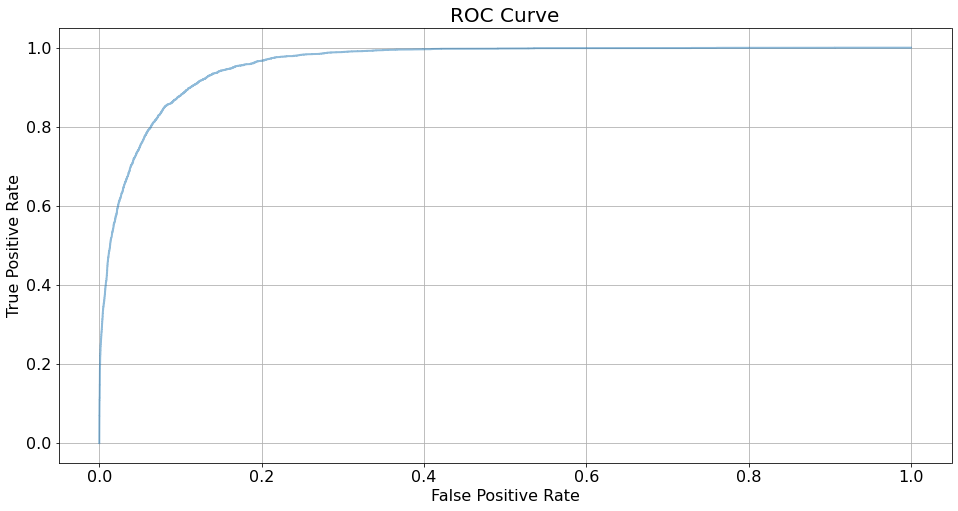

[0.         0.         0.         ... 0.99986633 0.99996658 1.        ]
[0.00000000e+00 2.00507953e-04 4.34433899e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.         0.98880832 0.98769531 ... 0.00296193 0.00293665 0.        ]


In [23]:
from catboost.utils import get_roc_curve
from catboost import Pool

catboost_pool = Pool(X_resampled, y_resampled,cat_features=cat_features)
(fpr, tpr, thresholds) = get_roc_curve(cbc_1, catboost_pool,plot=True)
print(fpr)
print(tpr)
print(thresholds)